<a href="https://colab.research.google.com/github/zlximon/Tensorflow_DL/blob/master/classification__learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_circles
sample_number=1000
x,y=make_circles(sample_number, 
                    noise=0.03, 
                    random_state=42)


In [4]:
circle=pd.DataFrame({"x0":x[:, 0], "x1":x[:, 1], "label":y})
circle


,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


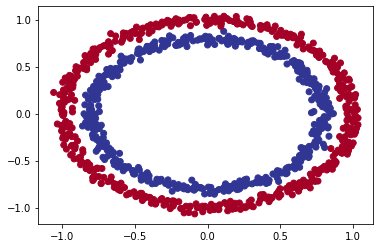

In [5]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu);


In [6]:
#check our features and labels shape
x.shape,y.shape

((1000, 2), (1000,))

In [7]:
#creating model 
tf.random.set_seed(42)
model1=tf.keras.Sequential([
tf.keras.layers.Dense(1)                            
])

model1.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),optimizer=tf.keras.optimizers.SGD(),metrics=["accuracy"])
model1.fit(x,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 2s 5ms/step - loss: 0.7437 - accuracy: 0.4750
Epoch 2/5
32/32 [==============================] - 0s 6ms/step - loss: 0.1855 - accuracy: 0.4960
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 0.1763 - accuracy: 0.4940
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.1740 - accuracy: 0.4920
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.1736 - accuracy: 0.5070


In [8]:
# improving model
model1.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1737 - accuracy: 0.4950
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1736 - accuracy: 0.4990
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.1738 - accuracy: 0.4560
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.1736 - accuracy: 0.4810
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1736 - accuracy: 0.4610
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1734 - accuracy: 0.5100
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1737 - accuracy: 0.4890
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 0.1736 - accuracy: 0.4800
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.1736 - accuracy: 0.4760
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1735 - accuracy: 0.4870
Epoch 11/

In [9]:
model1.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.1734 - accuracy: 0.5000


[0.17337140440940857, 0.5]

In [10]:
# creating better model
tf.random.set_seed(42)
model2=tf.keras.Sequential([
tf.keras.layers.Dense(64)                            ,
tf.keras.layers.Dense(1)
])
model2.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),optimizer=tf.keras.optimizers.SGD(),metrics=["accuracy"])
model2.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.5001 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1741 - accuracy: 0.5050
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1749 - accuracy: 0.4690
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1741 - accuracy: 0.4940
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1739 - accuracy: 0.5030
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1738 - accuracy: 0.5240
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1745 - accuracy: 0.4850
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1740 - accuracy: 0.5100
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1744 - accuracy: 0.4850
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1739 - accuracy: 0.4610
Epoch 11/

In [11]:
model2.evaluate(x,y)
#still our model is terrible 


32/32 [==============================] - 0s 1ms/step - loss: 0.1746 - accuracy: 0.5000


[0.17455480992794037, 0.5]

In [12]:
tf.random.set_seed(42)
model3=tf.keras.Sequential([
tf.keras.layers.Dense(100),
tf.keras.layers.Dense(10),
tf.keras.layers.Dense(1),
])
model3.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
model3.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 1.6481 - accuracy: 0.4860
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2159 - accuracy: 0.4690
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1750 - accuracy: 0.4860
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1740 - accuracy: 0.4730
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1738 - accuracy: 0.4810
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1738 - accuracy: 0.4490
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1737 - accuracy: 0.5240
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1739 - accuracy: 0.4960
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1740 - accuracy: 0.4890
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1738 - accuracy: 0.4480
Epoch 11/

In [13]:
model3.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.1751 - accuracy: 0.5040


[0.17511941492557526, 0.5040000081062317]

In [14]:
# we need to visualize our data 
def plot_decision_boundary(model,x,y):
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


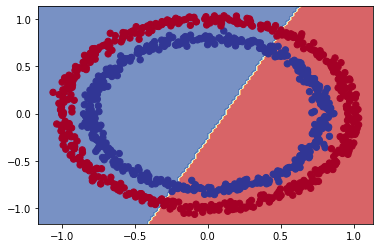

In [15]:
plot_decision_boundary(model3,x,y)

In [16]:
#checking our model with regression but to  change our loss function 
tf.random.set_seed(42)
x_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5)
x_reg_train=x_regression[:150]
x_reg_test=x_regression[150:]
y_reg_train= y_regression[:150]
y_reg_test= y_regression[ 150:]
x_reg_test,y_reg_test


(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([750, 755, 760, 765, 770, 775, 780, 785, 790, 795, 800, 805, 810,
        815, 820, 825, 830, 835, 840, 845, 850, 855, 860, 865, 870, 875,
        880, 885, 890, 895, 900, 905, 910, 915, 920, 925, 930, 935, 940,
        945, 950, 955, 960, 965, 970, 975, 980, 985, 990, 995], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([ 850,  855,  860,  865,  870,  875,  880,  885,  890,  895,  900,
         905,  910,  915,  920,  925,  930,  935,  940,  945,  950,  955,
         960,  965,  970,  975,  980,  985,  990,  995, 1000, 1005, 1010,
        1015, 1020, 1025, 1030, 1035, 1040, 1045, 1050, 1055, 1060, 1065,
        1070, 1075, 1080, 1085, 1090, 1095], dtype=int32)>)

In [17]:
tf.random.set_seed(42)
model3=tf.keras.Sequential([
tf.keras.layers.Dense(100),
tf.keras.layers.Dense(10),
tf.keras.layers.Dense(1)
])
model3.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(),metrics=["mae"])
model3.fit(tf.expand_dims(x_reg_train, axis=-1),y_reg_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 6ms/step - loss: 57.8927 - mae: 57.8927


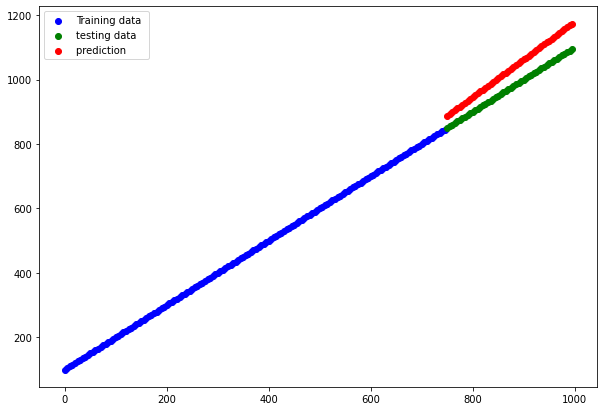

In [18]:
model3.evaluate(x_reg_test,y_reg_test)
y_reg_pred=model3.predict(x_reg_test)
# plot model
plt.figure(figsize=(10,7))
plt.scatter(x_reg_train,y_reg_train,c="b",label="Training data ")
plt.scatter(x_reg_test,y_reg_test,c="g",label="testing data ")
plt.scatter(x_reg_test,y_reg_pred,c="r",label="prediction ")
plt.legend()

In [19]:
#recreating our model
tf.random.set_seed(42)
model4=tf.keras.Sequential([
tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)


  ])
model4.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),optimizer=tf.keras.optimizers.Adam(lr=0.001),metrics=["accuracy"])
history=model4.fit(x,y,epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 1ms/step - loss: 6.1326 - accuracy: 0.4860
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5656 - accuracy: 0.4860
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 5.0861 - accuracy: 0.4930
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.5372 - accuracy: 0.4950
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9970 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.4722 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.0187 - accuracy: 0.4990
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 2.6671 - accuracy: 0.4990
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 2.2624 - accuracy: 0.4990
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 1.5000 - accuracy: 0.5000
Epoch 11/100
32/32 [=

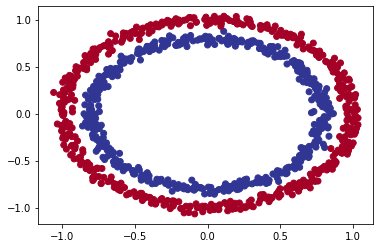

In [20]:
plt.scatter(x [:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu);


doing binary classifcation...


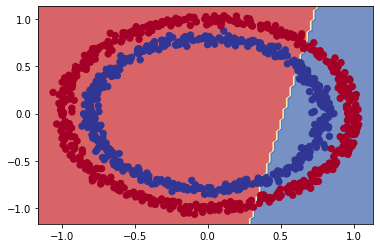

In [21]:
plot_decision_boundary(model4,x=x,y=y)

In [22]:
#trying another model
tf.random.set_seed(42)
model5=tf.keras.Sequential([
tf.keras.layers.Dense(4,activation="relu"),
tf.keras.layers.Dense(4,activation="relu"),
tf.keras.layers.Dense(1,activation="relu"),

])
model5.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=["accuracy"])
history=model5.fit(x,y,epochs=250,verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


doing binary classifcation...


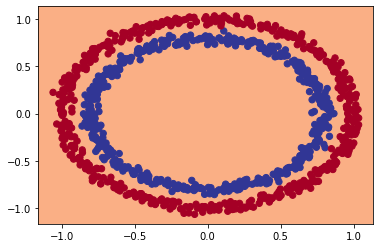

In [23]:
plot_decision_boundary(model5,x,y)

In [24]:
tf.random.set_seed(42)
final_model=tf.keras.Sequential([
tf.keras.layers.Dense(4,activation="relu"),                                 
tf.keras.layers.Dense(4,activation="relu"),
tf.keras.layers.Dense(1,activation="sigmoid"),
])
final_model.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
final_model.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

In [25]:
final_model.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

doing binary classifcation...


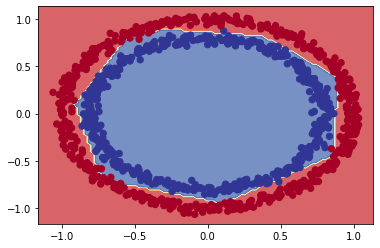

In [26]:
plot_decision_boundary(final_model,x,y)

In [27]:
A=tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

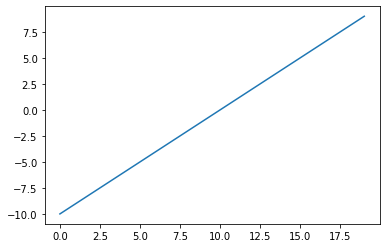

In [28]:
plt.plot(A)

In [29]:
def sigmoid(x):## sigmoid convert our data between 0 and 1

  return 1/(1+tf.exp(-x))


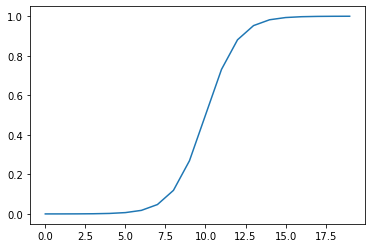

In [30]:
plt.plot(sigmoid(A))

In [31]:
def relu(x):
  return tf.maximum(0,x)


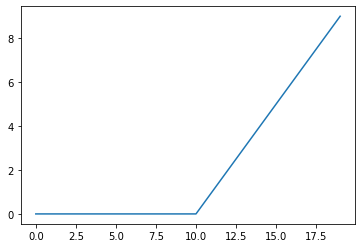

In [32]:
plt.plot(relu(A))

In [33]:
# split data 
x_train,y_train=x[:800],y[:800]
x_test,y_test=x[800:],y[800:]



In [34]:
# create model to feed it with new data
tf.random.set_seed(42)
model8=tf.keras.Sequential([
tf.keras.layers.Dense(4,activation="relu"),
tf.keras.layers.Dense(4,activation="relu"),
tf.keras.layers.Dense(1,activation="sigmoid")
])

model8.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(lr=0.01),metrics=["accuracy"])
history=model8.fit(x_train,y_train,epochs=100)


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/100
25/25 [=

In [35]:
model8.evaluate(x_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0245 - accuracy: 0.9950


[0.02450874261558056, 0.9950000047683716]

doing binary classifcation...
doing binary classifcation...


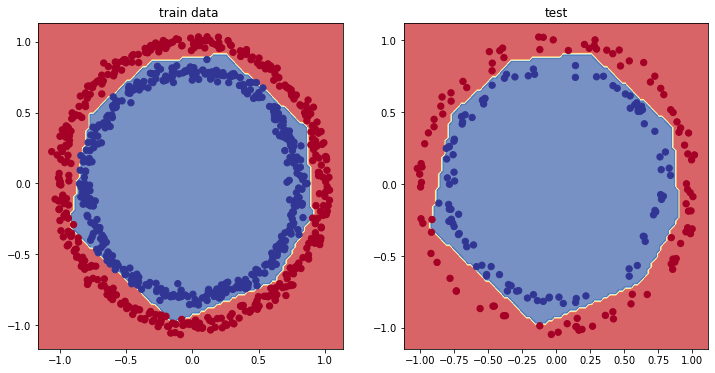

In [36]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("train data ")
plot_decision_boundary(model8,x_train,y_train )
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model8,x_test,y_test)
plt.show()

In [37]:
#loss curves
pd.DataFrame(history.history)


,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
...,...,...
95,0.038384,0.98875
96,0.037549,0.99000
97,0.036139,0.99250
98,0.035137,0.99250


Text(0.5, 1.0, 'model 8 loss curves')

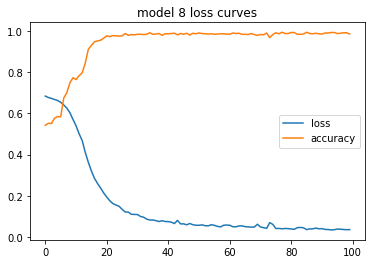

In [38]:
pd.DataFrame(history.history).plot()
plt.title("model 8 loss curves")
# when is loss value going down it means that our model getting better  and prediction are getting better too

In [39]:
  # we want ideal learnig rate using Callback 

In [40]:
tf.random.set_seed(42)
model9=tf.keras.Sequential([
tf.keras.layers.Dense(4,activation="relu"),                            
tf.keras.layers.Dense(4,activation="relu"),
tf.keras.layers.Dense(1,activation="sigmoid"),
])
#creating call back

model9.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
lr_Scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 * 10**(epoch/20))
history9=model9.fit(x_train,y_train,epochs=100,callbacks=[lr_Scheduler])


Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

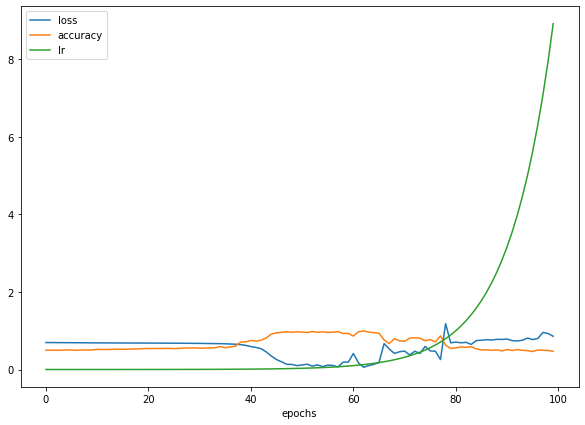

In [41]:
pd.DataFrame(history9.history).plot(figsize=(10,7),xlabel="epochs")

Text(0.5, 1.0, 'learning  rate vs loss')

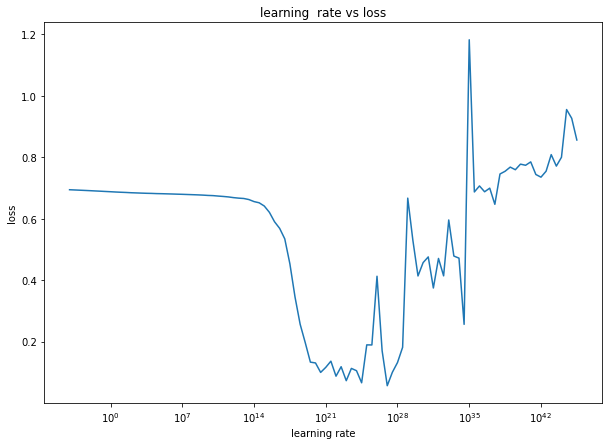

In [43]:
lrs=1e-4*(10**(tf.range(100)/2))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history9.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("learning  rate vs loss")